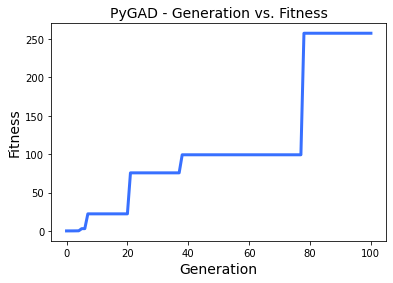

'd'

In [14]:
import pygad
import numpy

inputs = [0.4,1,0,7,8]
desired_output = 32

def fitness_func(ga_indstance, solution, solution_idx):
    output = numpy.sum(solution*inputs)
    fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
    
    return fitness

ga_instance = pygad.GA(num_generations=100,
                       sol_per_pop=10,
                       num_genes=len(inputs),
                       num_parents_mating=2,
                       fitness_func=fitness_func,
                       mutation_type="random",
                       mutation_probability=0.6,
                       parallel_processing=None)

ga_instance.run()

ga_instance.plot_fitness()
"d"

Generation = 1
Fitness    = 4.609181410791335
Generation = 2
Fitness    = 4.722812495641946
Generation = 3
Fitness    = 4.722812495641946
Generation = 4
Fitness    = 7.568598873092962
Generation = 5
Fitness    = 8.287188177949266
Generation = 6
Fitness    = 8.287188177949266
Generation = 7
Fitness    = 8.287188177949266
Generation = 8
Fitness    = 8.287188177949266
Generation = 9
Fitness    = 8.287188177949266
Generation = 10
Fitness    = 9.446189607546364
Generation = 11
Fitness    = 9.446189607546364
Generation = 12
Fitness    = 9.446189607546364
Generation = 13
Fitness    = 9.446189607546364
Generation = 14
Fitness    = 9.49964602208758
Generation = 15
Fitness    = 9.49964602208758
Generation = 16
Fitness    = 9.49964602208758
Generation = 17
Fitness    = 14.963203727322552
Generation = 18
Fitness    = 19.02210943086707
Generation = 19
Fitness    = 19.02210943086707
Generation = 20
Fitness    = 19.02210943086707
Generation = 21
Fitness    = 19.02210943086707
Generation = 22
Fitness 

c:\Users\Ejeong\Anaconda3\lib\site-packages\pygad\visualize\plot.py:21: UserWarning: Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.
  warnings.warn("Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.")


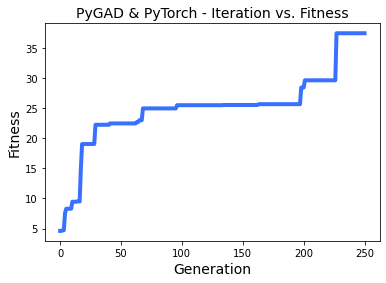

Fitness value of the best solution = 37.41155288771098
Index of the best solution : 0
Predictions : n [[0.09781872]
 [0.5937469 ]
 [1.2131995 ]
 [2.488316  ]]
Absolute Error :  0.026729701


In [10]:
import torch
import pygad.torchga as torchga
#  import torchga
import pygad

def fitness_func(ga_instance, solution, sol_idx):
    global data_inputs, data_outputs, torch_ga, model, loss_function

    model_weights_dict = torchga.model_weights_as_dict(model=model,
                                                       weights_vector=solution)

    # Use the current solution as the model parameters.
    model.load_state_dict(model_weights_dict)

    predictions = model(data_inputs)
    abs_error = loss_function(predictions, data_outputs).detach().numpy() + 0.00000001

    solution_fitness = 1.0 / abs_error

    return solution_fitness

def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

# Create the PyTorch model.
input_layer = torch.nn.Linear(3, 2)
relu_layer = torch.nn.ReLU()
output_layer = torch.nn.Linear(2, 1)

model = torch.nn.Sequential(input_layer,
                            relu_layer,
                            output_layer)
# print(model)

# Create an instance of the pygad.torchga.TorchGA class to build the initial population.
torch_ga = torchga.TorchGA(model=model,
                           num_solutions=10)

loss_function = torch.nn.L1Loss()

# Data inputs
data_inputs = torch.tensor([[0.02, 0.1, 0.15],
                            [0.7, 0.6, 0.8],
                            [1.5, 1.2, 1.7],
                            [3.2, 2.9, 3.1]])

# Data outputs
data_outputs = torch.tensor([[0.1],
                             [0.6],
                             [1.3],
                             [2.5]])

# Prepare the PyGAD parameters. Check the documentation for more information: https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#pygad-ga-class
num_generations = 250 # Number of generations.
num_parents_mating = 5 # Number of solutions to be selected as parents in the mating pool.
initial_population = torch_ga.population_weights # Initial population of network weights
parent_selection_type = "sss" # Type of parent selection.
crossover_type = "single_point" # Type of the crossover operator.
mutation_type = "random" # Type of the mutation operator.
mutation_percent_genes = 10 # Percentage of genes to mutate. This parameter has no action if the parameter mutation_num_genes exists.
keep_parents = -1 # Number of parents to keep in the next population. -1 means keep all parents and 0 means keep nothing.

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       parent_selection_type=parent_selection_type,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       keep_parents=keep_parents,
                       on_generation=callback_generation)

ga_instance.run()

# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_result(title="PyGAD & PyTorch - Iteration vs. Fitness", linewidth=4)

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# Fetch the parameters of the best solution.
best_solution_weights = torchga.model_weights_as_dict(model=model,
                                                      weights_vector=solution)
model.load_state_dict(best_solution_weights)
predictions = model(data_inputs)
print("Predictions : n", predictions.detach().numpy())

abs_error = loss_function(predictions, data_outputs)
print("Absolute Error : ", abs_error.detach().numpy())